In [1]:
import serial.tools.list_ports
import serial
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
ports = serial.tools.list_ports.comports()
for n in ports:
    print(n.description)
    print(n.device)

USB Serial Device (COM3)
COM3


In [4]:
dev = 'COM3'
nicla = serial.Serial(port=dev,baudrate=115200,timeout=.1)

In [5]:
n_readings = 200
column_titles = ['time', 'temp', 'pressure', 'gas']

nicla.flush()
nicla.reset_input_buffer()

nicla.write(bytes("{f0}".format(f0=n_readings), 'utf-8'))

data_table = np.zeros((n_readings, len(column_titles)))
# print(data_table)

for n in range(n_readings):
    data = nicla.readline()
    data = np.fromstring(data, sep=',')
    if len(data) == len(column_titles):
        data_table[n,:] = data

nicla.close()

tpg_data = pd.DataFrame(data_table, columns=column_titles)
print(tpg_data)


      time   temp  pressure      gas
0      0.0   0.00      0.00      0.0
1      0.0   0.00      0.00      0.0
2      0.0   0.00      0.00      0.0
3      0.0   0.00      0.00      0.0
4      0.0   0.00      0.00      0.0
..     ...    ...       ...      ...
195  595.0  30.76   1010.97  14529.0
196  599.0  30.76   1010.97  14529.0
197  602.0  30.76   1010.97  14529.0
198  605.0  30.76   1010.97  14529.0
199  608.0  30.76   1010.97  14529.0

[200 rows x 4 columns]


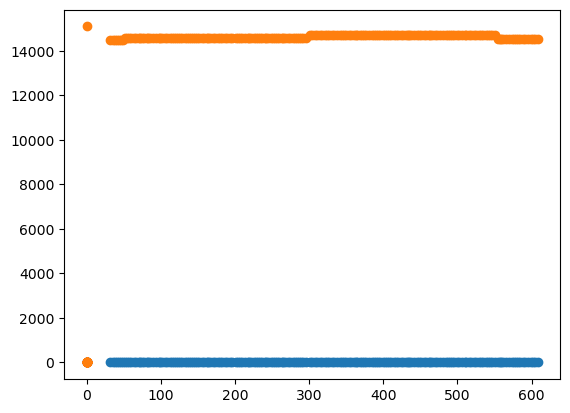

In [6]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.scatter(tpg_data['time'], tpg_data['temp'])

ax.scatter(tpg_data['time'], tpg_data['gas'])

plt.show()


<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
C:\Users\abiga\AppData\Local\Temp\ipykernel_18520\3095893765.py:7: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel('Gas Sensor Reading (a.u.) / Temperature ($^\circ$C)')


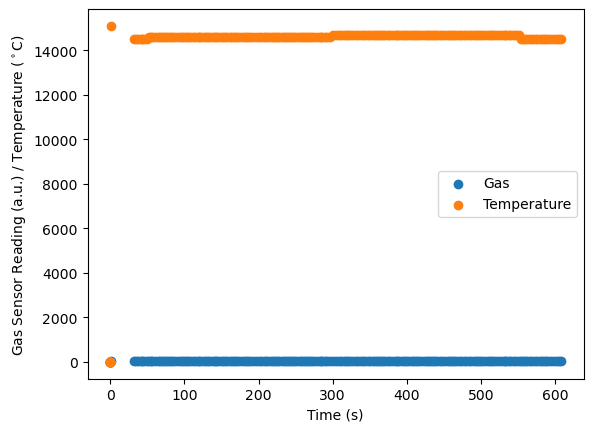

In [7]:
fig = plt.figure()
ax= fig.add_subplot(111)
ax.scatter(tpg_data['time'], tpg_data['temp'])
ax.scatter(tpg_data['time'], tpg_data['gas'])

ax.set_xlabel('Time (s)')
ax.set_ylabel('Gas Sensor Reading (a.u.) / Temperature ($^\circ$C)')
plt.legend(['Gas', 'Temperature'])
plt.show()

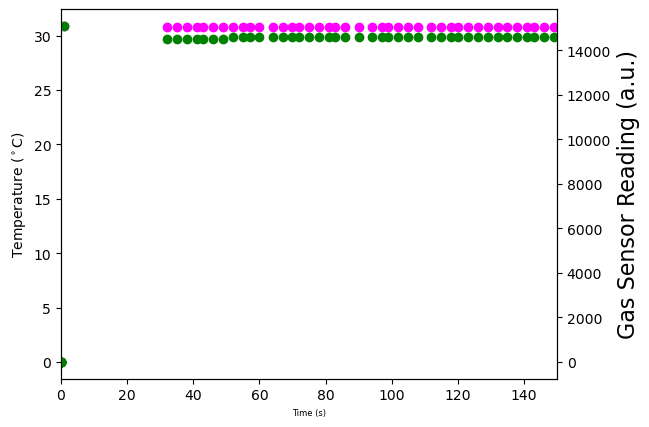

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data['time'], tpg_data['temp'], color='magenta')
ax.set_ylabel(r'Temperature ($^\circ$C)')

ax2 = ax.twinx()

ax2.scatter(tpg_data['time'], tpg_data['gas'], color='green')
ax2.set_ylabel('Gas Sensor Reading (a.u.)',fontsize=16)

ax.set_xlabel('Time (s)',fontsize=6)

plt.xlim(0,150)

plt.show()

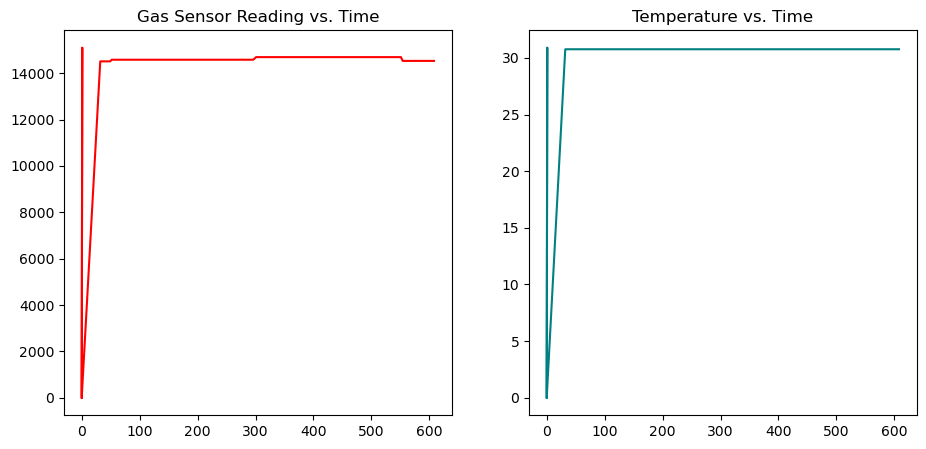

In [9]:
fig = plt.figure(figsize=(11,5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# c=colour, it's used in the format c=(red, green, blue) where each value is between 0 and 1
ax1.plot(tpg_data['time'], tpg_data['gas'], c=(1.0, 0.0, 0.0))
ax1.set_title('Gas Sensor Reading vs. Time')

ax2.plot(tpg_data['time'], tpg_data['temp'], c=(0.0, 0.5, 0.5))
ax2.set_title('Temperature vs. Time')

plt.show()


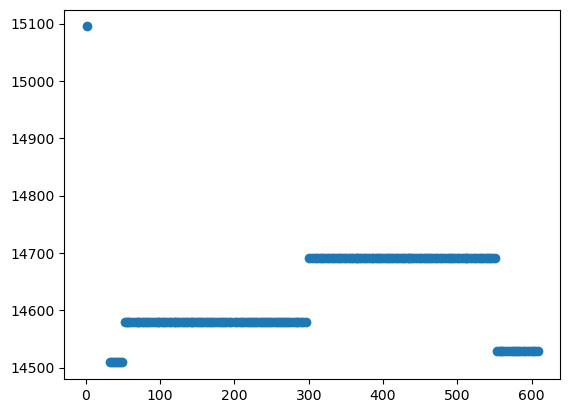

In [10]:
tpg_data_filter = tpg_data[tpg_data['gas'] > 0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data_filter['time'], tpg_data_filter['gas'])
plt.show()

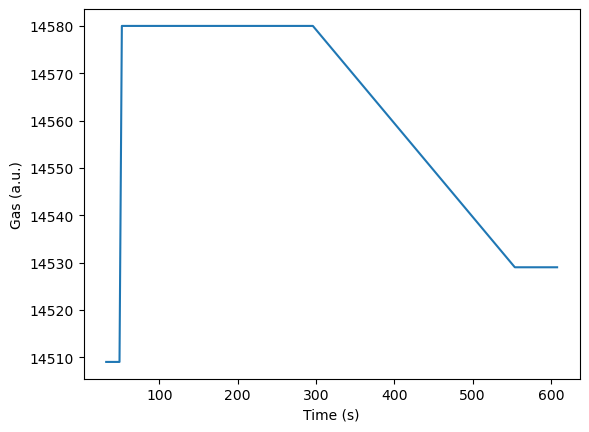

In [14]:
lower_bound = tpg_data['gas'].quantile(0.01)
upper_bound = tpg_data['gas'].quantile(0.99)

# Here's the tricky bit - we ignore values that are below the lower bound or above the upper bound - ask ChatGPT what the code is doing!
data_clean = tpg_data[(tpg_data['gas'] > lower_bound) & (tpg_data['gas'] < upper_bound)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data_clean['time'], data_clean['gas'])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Gas (a.u.)')

# Save graph - resolution @ 200 dots per inch, tight bounding box
filename = 'plot_t.png'

# The code below will save your figure to the directory where this code is stored.
# Save before plt.fig()
plt.savefig(filename, dpi=200, bbox_inches='tight')

plt.show()


In [12]:
# Save graph - resolution @ 200 dots per inch, tight bounding box
filename = 'plot_t.png'

# The code below will save your figure to the directory where this code is stored.
plt.savefig(filename, dpi=200, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

TypeError: Got both 'c' and 'color', which are aliases of one another

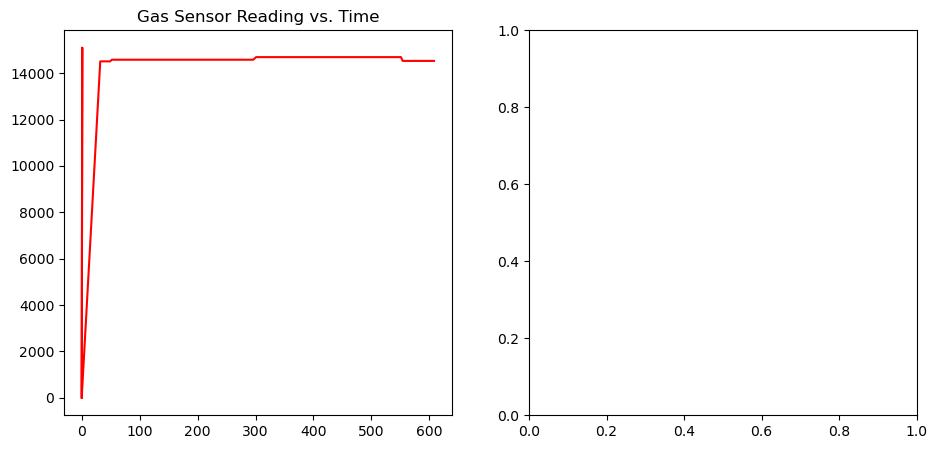

In [20]:
fig = plt.figure(figsize=(11,5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# c=colour, it's used in the format c=(red, green, blue) where each value is between 0 and 1
ax1.plot(tpg_data['time'], tpg_data['gas'], c=(1.0, 0.0, 0.0))
ax1.set_title('Gas Sensor Reading vs. Time')

ax2.plot(tpg_data['time'], tpg_data['temp'], c=(0.0, 0.5, 0.5))
ax2.set_title('Temperature vs. Time')

plt.show()
